In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Labels_features
feats_labels=["npoints","radius","width","std","aspect_ratio",
                "front_length","front_reg","circularity","kurtosis",
                "linearity","mean_angular_d","median_std",
                "mean_curvature","closest_dist","radius_nearest",
                "width_nearest","std_nearest","aspect_ratio_nearest",
                "front_length_nearest","front_reg_nearest",
                "circularity_nearest","kurtosis_nearest",
                "linearity_nearest","mean_angular_d_nearest",
                "median_std_nearest","mean_curvature_nearest","closest_dist_nearest","NN"]

# Import data
seg = pd.read_csv("laser_data/DataTrain.csv", header=None, names=feats_labels, usecols=range(len(feats_labels)))
y=np.loadtxt("laser_data/LabelsTrain.csv")



# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(seg, y, test_size=0.4, random_state=None)


print(X_train.shape)
print(y_train.shape)

(8662, 28)
(8662,)


Entrenando modelo KNneighnordsClassifier ...


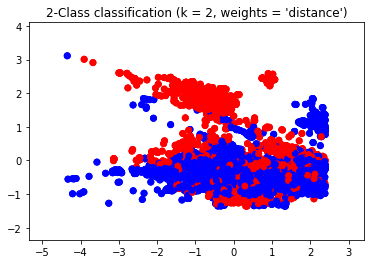

In [6]:
# Entrenar clasificador tomamos el modelo 
print('Entrenando modelo KNneighnordsClassifier ...')

n_neighbors = 2
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    #Z = Z.reshape(xx.shape)
    #plt.figure(figsize=(7,5))
    #plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

In [24]:
# Create and fit a nearest-neighbor classifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
print("predicted:", knn.predict(X_test))
print("actual   :", y_test)

output = []
y_predict = knn.predict(X_test)
for i in range(len(y_test)):
    output.append([int(y_test[i]), int(y_predict[i])])
output=np.array(output)
np.savetxt("output.csv", output, fmt='%d')


from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, labels=[1, 0]))

predicted: [1. 0. 0. ... 1. 0. 1.]
actual   : [1. 0. 0. ... 1. 0. 1.]
              precision    recall  f1-score   support

           1       0.94      0.99      0.96      4049
           0       0.97      0.85      0.91      1726

   micro avg       0.95      0.95      0.95      5775
   macro avg       0.96      0.92      0.94      5775
weighted avg       0.95      0.95      0.95      5775



In [42]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

def print_cv_score_summary(model, xx, yy, cv):
    scores = cross_val_score(model, xx, yy, cv=cv, n_jobs=1)
    print("mean: {:3f}, stdev: {:3f}".format(
        np.mean(scores), np.std(scores)))
    
print_cv_score_summary(knn, X_test, y_test,
                       cv=model_selection.KFold(15, shuffle=True, random_state = 42))

mean: 0.940260, stdev: 0.010215


In [44]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(knn, 'groupModel_knn.pkl')

['groupModel_knn.pkl']